# Data Analysis and Data Science
## Putting it all together 

By: Caroline Labelle
<br>For: BCM6065-65

<br>
Date: Date: July 6th, 2023

<hr style="border:1px solid black"> </hr>

In [ ]:
### Student Name: Anne-Solène Valton

Complete the following exercises and push your Notebook to your GitHum account. You have until July 7th, 5PM to submit your GitHub account URL to StudiUM.

In [1]:
### Import sklearn
import sklearn.decomposition, sklearn.cluster

### Import scipy
import scipy as sp

### Import pandas, numpy, seaborn and matplotlib.pyplot
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize':(4, 2)})
sns.set_theme(context="notebook", style="white", palette="Set2")

# Breast Cancer Subtypes Analysis [50 pts]

You are given a gene expression dataset of N breast cancer patients with their clinical subtype. You wish to know if you can assess the clinical subtypes based on the gene expression.

## Import the data [10 pts]

Your dataset concist of three files: `genes_id.txt`, `patient_subtype.txt` and `patient_expression.txt`. Import the various files and build your dataset daframe.

In [41]:
### Import the files
gene_id = pd.read_csv("genes_id.txt", header=None, names=["Genes"])
gene_id

,Genes
0,ENSG00000011426.9
1,ENSG00000054598.6
2,ENSG00000062038.12
3,ENSG00000077152.8
4,ENSG00000082175.13
5,ENSG00000089685.13
6,ENSG00000091831.20
7,ENSG00000092621.10
8,ENSG00000094804.8
9,ENSG00000099953.8


In [42]:
patient_subtype = pd.read_csv("patient_subtype.txt", header=None, names=["Subtype"])
patient_subtype

,Subtype
0,Basal
1,Basal
2,Basal
3,Basal
4,Basal
...,...
640,Normal
641,Normal
642,Normal
643,Normal


In [63]:
patient_expression = pd.read_csv("patient_expression.txt",sep=" ", header=None)
patient_expression


,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,0.415417,3.163366,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,2.035764,2.339897,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090
2,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,1.927426,...,1.123048,3.647681,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836
3,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,2.317170,...,0.930984,3.071066,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472
4,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,0.924654,...,1.975961,2.893713,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,0.820838,2.418684,3.460263,1.714065,2.574779,1.158088,2.099645,2.689138,0.705885,3.340791,...,2.522965,1.112896,2.147804,0.498596,1.633678,1.791459,5.193883,5.470001,2.507121,2.424799
641,1.666605,1.818016,2.965531,3.398361,1.131149,2.243665,2.103245,3.090764,1.380203,4.770786,...,1.989089,2.517961,1.820856,1.147327,3.336830,2.926771,4.834529,5.614588,1.520555,2.128657
642,0.810583,2.097097,3.595351,1.667315,0.563232,1.041924,1.894974,1.950360,1.017512,3.408128,...,1.953431,1.019320,1.837105,0.575619,1.638372,1.749170,5.413128,5.591127,2.129137,1.244375
643,1.153391,0.935530,2.415240,2.179527,0.183943,1.688365,0.297845,2.814779,0.754930,4.585375,...,0.820314,2.377948,2.120787,0.626063,2.161975,1.224772,3.553468,3.305371,1.386436,0.515823


In [64]:
### How many patients are you considering?
print(patient_subtype.shape[0], "patients")

### How many genes are you considering?
print(gene_id.shape[0], "genes")


645 patients
47 genes


In [46]:
[gene_id]

[                 Genes
 0    ENSG00000011426.9
 1    ENSG00000054598.6
 2   ENSG00000062038.12
 3    ENSG00000077152.8
 4   ENSG00000082175.13
 5   ENSG00000089685.13
 6   ENSG00000091831.20
 7   ENSG00000092621.10
 8    ENSG00000094804.8
 9    ENSG00000099953.8
 10  ENSG00000101057.14
 11  ENSG00000104332.10
 12  ENSG00000105173.12
 13   ENSG00000106605.9
 14  ENSG00000107262.15
 15  ENSG00000115648.12
 16  ENSG00000117399.12
 17  ENSG00000117724.11
 18  ENSG00000128422.14
 19   ENSG00000129514.5
 20  ENSG00000133627.16
 21  ENSG00000134057.13
 22  ENSG00000135679.20
 23  ENSG00000136997.13
 24  ENSG00000138180.14
 25  ENSG00000141424.11
 26  ENSG00000141736.12
 27  ENSG00000141738.12
 28  ENSG00000142945.11
 29  ENSG00000146648.14
 30  ENSG00000148773.11
 31   ENSG00000151715.6
 32  ENSG00000160867.13
 33  ENSG00000164611.11
 34   ENSG00000165304.6
 35  ENSG00000171428.12
 36  ENSG00000171604.10
 37  ENSG00000171791.11
 38  ENSG00000171848.12
 39  ENSG00000173890.15
 40  ENSG0000017

In [65]:
### Combine the data from all three files into one dataframe
### Clue: you should define columns' names and add a column
patient_expression.columns = gene_id.loc[:, "Genes"]
patient_expression

new_df = patient_expression
new_df


Genes,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,ENSG00000099953.8,...,ENSG00000171791.11,ENSG00000171848.12,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,0.415417,3.163366,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,2.035764,2.339897,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090
2,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,1.927426,...,1.123048,3.647681,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836
3,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,2.317170,...,0.930984,3.071066,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472
4,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,0.924654,...,1.975961,2.893713,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,0.820838,2.418684,3.460263,1.714065,2.574779,1.158088,2.099645,2.689138,0.705885,3.340791,...,2.522965,1.112896,2.147804,0.498596,1.633678,1.791459,5.193883,5.470001,2.507121,2.424799
641,1.666605,1.818016,2.965531,3.398361,1.131149,2.243665,2.103245,3.090764,1.380203,4.770786,...,1.989089,2.517961,1.820856,1.147327,3.336830,2.926771,4.834529,5.614588,1.520555,2.128657
642,0.810583,2.097097,3.595351,1.667315,0.563232,1.041924,1.894974,1.950360,1.017512,3.408128,...,1.953431,1.019320,1.837105,0.575619,1.638372,1.749170,5.413128,5.591127,2.129137,1.244375
643,1.153391,0.935530,2.415240,2.179527,0.183943,1.688365,0.297845,2.814779,0.754930,4.585375,...,0.820314,2.377948,2.120787,0.626063,2.161975,1.224772,3.553468,3.305371,1.386436,0.515823


In [71]:
new_df["Subtype"] = patient_subtype
new_df 

Genes,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,ENSG00000099953.8,...,ENSG00000171848.12,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5,Subtype
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,3.163366,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720,Basal
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,2.339897,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090,Basal
2,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,1.927426,...,3.647681,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836,Basal
3,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,2.317170,...,3.071066,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472,Basal
4,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,0.924654,...,2.893713,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927,Basal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,0.820838,2.418684,3.460263,1.714065,2.574779,1.158088,2.099645,2.689138,0.705885,3.340791,...,1.112896,2.147804,0.498596,1.633678,1.791459,5.193883,5.470001,2.507121,2.424799,Normal
641,1.666605,1.818016,2.965531,3.398361,1.131149,2.243665,2.103245,3.090764,1.380203,4.770786,...,2.517961,1.820856,1.147327,3.336830,2.926771,4.834529,5.614588,1.520555,2.128657,Normal
642,0.810583,2.097097,3.595351,1.667315,0.563232,1.041924,1.894974,1.950360,1.017512,3.408128,...,1.019320,1.837105,0.575619,1.638372,1.749170,5.413128,5.591127,2.129137,1.244375,Normal
643,1.153391,0.935530,2.415240,2.179527,0.183943,1.688365,0.297845,2.814779,0.754930,4.585375,...,2.377948,2.120787,0.626063,2.161975,1.224772,3.553468,3.305371,1.386436,0.515823,Normal


## Explore the dataset [20 pts]

In [67]:
### How many subtypes are you considering?
print(new_df.Subtype.nunique(), "subtypes")

5 subtypes


In [68]:
### How many patients are associtated to each subtype?
new_df.Subtype.value_counts()

Subtype
Basal     191
LumA      179
LumB      165
Her2       82
Normal     28
Name: count, dtype: int64

In [87]:
### Generate a graph of the average expression of each gene.
subset_mean = new_df.iloc[:, 0:47].mean(axis=0)
subset_mean

Genes
ENSG00000011426.9     2.164062
ENSG00000054598.6     1.535686
ENSG00000062038.12    2.102870
ENSG00000077152.8     3.132112
ENSG00000082175.13    1.179845
ENSG00000089685.13    2.554557
ENSG00000091831.20    2.491631
ENSG00000092621.10    2.452480
ENSG00000094804.8     1.803410
ENSG00000099953.8     3.506780
ENSG00000101057.14    2.927418
ENSG00000104332.10    2.226754
ENSG00000105173.12    1.360070
ENSG00000106605.9     3.432338
ENSG00000107262.15    2.479991
ENSG00000115648.12    2.966889
ENSG00000117399.12    2.978518
ENSG00000117724.11    2.402607
ENSG00000128422.14    2.524521
ENSG00000129514.5     3.439974
ENSG00000133627.16    1.146421
ENSG00000134057.13    3.088703
ENSG00000135679.20    2.056612
ENSG00000136997.13    3.338576
ENSG00000138180.14    2.161510
ENSG00000141424.11    4.854191
ENSG00000141736.12    3.646903
ENSG00000141738.12    2.391021
ENSG00000142945.11    2.190188
ENSG00000146648.14    1.253302
ENSG00000148773.11    2.236166
ENSG00000151715.6     1.273940
EN

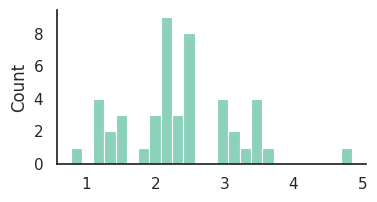

In [88]:
sns.histplot(subset_mean, bins=25)
sns.despine()

In [89]:
### What are the two genes with the largest standard deviation for all patient
subset_std = new_df.iloc[:, 0:47].std()
subset_std

Genes
ENSG00000011426.9     0.781086
ENSG00000054598.6     1.254415
ENSG00000062038.12    1.246204
ENSG00000077152.8     0.744226
ENSG00000082175.13    1.332091
ENSG00000089685.13    0.854562
ENSG00000091831.20    1.798359
ENSG00000092621.10    1.145830
ENSG00000094804.8     0.715625
ENSG00000099953.8     1.197679
ENSG00000101057.14    1.080362
ENSG00000104332.10    1.788465
ENSG00000105173.12    0.858695
ENSG00000106605.9     0.672515
ENSG00000107262.15    0.581383
ENSG00000115648.12    1.445019
ENSG00000117399.12    0.930666
ENSG00000117724.11    0.743877
ENSG00000128422.14    1.880477
ENSG00000129514.5     1.752245
ENSG00000133627.16    0.511039
ENSG00000134057.13    0.626176
ENSG00000135679.20    0.489934
ENSG00000136997.13    0.908470
ENSG00000138180.14    0.721745
ENSG00000141424.11    1.352087
ENSG00000141736.12    1.110351
ENSG00000141738.12    0.962185
ENSG00000142945.11    0.759882
ENSG00000146648.14    0.950554
ENSG00000148773.11    0.738464
ENSG00000151715.6     0.961420
EN

In [92]:

subset_std_sorted = subset_std.sort_values(ascending=False)
subset_std_sorted.head(2)

Genes
ENSG00000186081.10    1.899352
ENSG00000128422.14    1.880477
dtype: float64

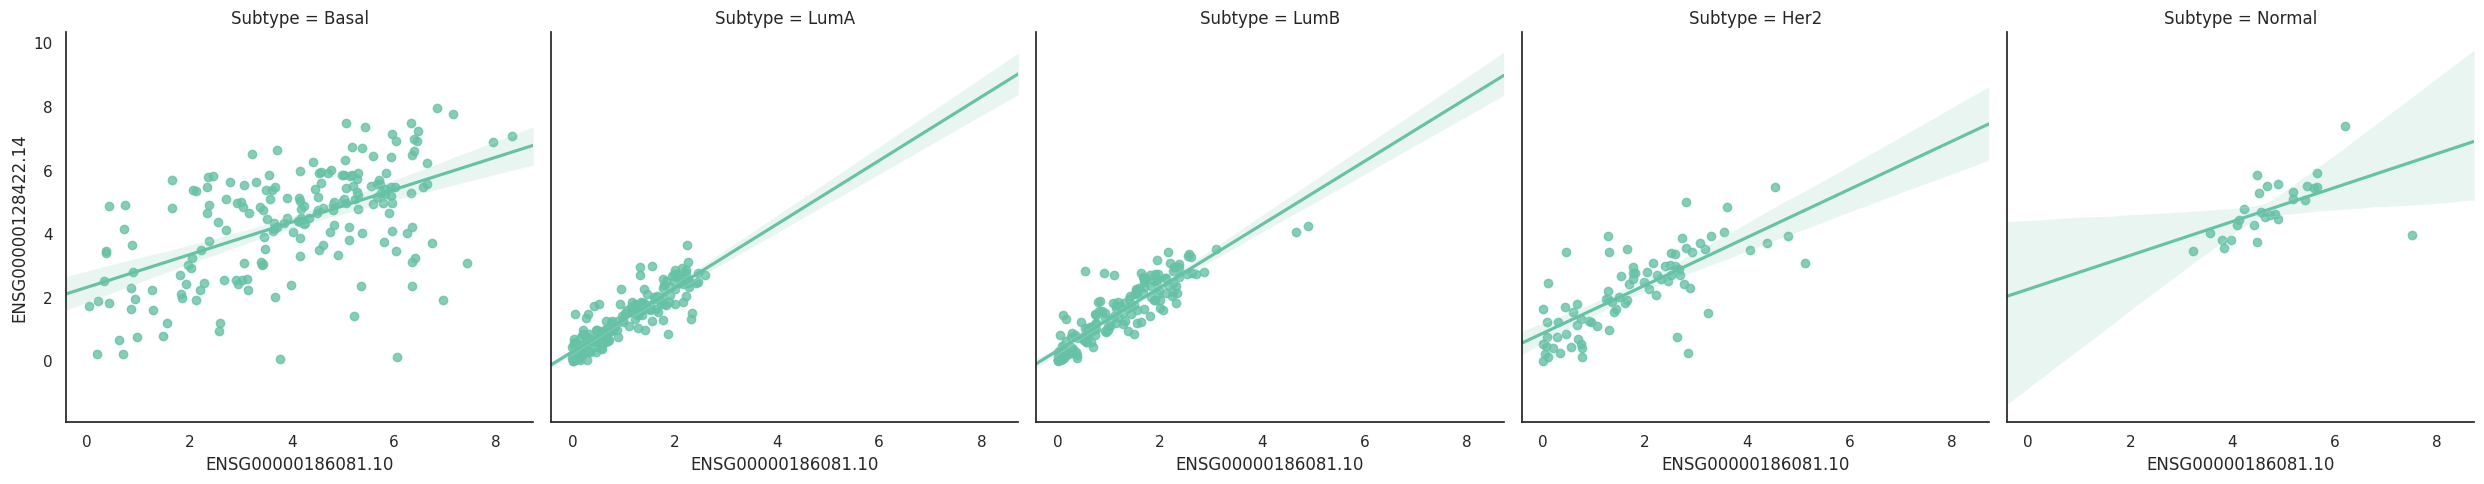

In [93]:
### Compare the expression of these two genes: are they corrolated based on tumor subtypes?
### To answer this question, make a graph and calcute correlation coefficients. 
### Briefly describe your results.
sns.lmplot(data=new_df, x="ENSG00000186081.10", y="ENSG00000128422.14", col="Subtype", truncate=False)
sns.despine()

In [104]:
subset_basal = new_df.loc[new_df.Subtype == "Basal", ["ENSG00000186081.10","ENSG00000128422.14"] ]
subset_basal

Genes,ENSG00000186081.10,ENSG00000128422.14
0,5.678637,5.560600
1,5.370061,4.021198
2,3.125330,2.577910
3,5.953152,4.104817
4,0.189085,0.216795
...,...,...
186,3.582537,5.109221
187,6.362290,2.356544
188,6.850178,7.957823
189,5.944343,5.197572


In [105]:
subset_luma = new_df.loc[new_df.Subtype == "LumA",["ENSG00000186081.10","ENSG00000128422.14"]]
subset_luma

Genes,ENSG00000186081.10,ENSG00000128422.14
191,0.592587,0.795729
192,0.886949,0.760079
193,1.286960,1.031558
194,1.215083,1.738610
195,1.914587,2.350655
...,...,...
365,1.510541,1.761315
366,0.992812,1.285827
367,0.280583,0.748396
368,0.590570,0.613998


In [106]:
subset_lumb = new_df.loc[new_df.Subtype == "LumB",["ENSG00000186081.10","ENSG00000128422.14"]]
subset_lumb

Genes,ENSG00000186081.10,ENSG00000128422.14
370,1.827732,2.359140
371,1.413262,2.051267
372,1.733096,2.617747
373,1.803366,1.435514
374,1.425912,1.480589
...,...,...
530,0.281954,0.876569
531,0.206081,0.220241
532,0.004519,0.037594
533,0.015313,0.030846


In [107]:
subset_her2 = new_df.loc[new_df.Subtype == "Her2", ["ENSG00000186081.10","ENSG00000128422.14"]]
subset_her2

Genes,ENSG00000186081.10,ENSG00000128422.14
535,0.204136,0.412660
536,2.318698,2.602842
537,0.445875,0.861602
538,0.052749,0.472042
539,1.768583,2.975623
...,...,...
612,2.032773,2.797806
613,2.665850,2.901382
614,2.794034,3.565519
615,1.796400,2.775404


In [108]:
subset_normal = new_df.loc[new_df.Subtype == "Normal", ["ENSG00000186081.10","ENSG00000128422.14"]]
subset_normal

Genes,ENSG00000186081.10,ENSG00000128422.14
617,7.516338,3.985922
618,5.593808,5.456094
619,4.883837,5.565892
620,4.634022,4.551045
621,4.420934,4.296244
622,6.196455,7.401967
623,5.465663,5.518438
624,4.135096,4.447065
625,4.727245,4.594035
626,3.962117,3.808068


In [120]:
print("Pearson correlation basal: ",np.corrcoef(subset_basal["ENSG00000186081.10"],subset_basal["ENSG00000128422.14"]))
print("Pearson correlation lumA: ",np.corrcoef(subset_luma["ENSG00000186081.10"],subset_luma["ENSG00000128422.14"]))
print("Pearson correlation lumB: ",np.corrcoef(subset_lumb["ENSG00000186081.10"],subset_lumb["ENSG00000128422.14"]))
print("Pearson correlation Her2: ",np.corrcoef(subset_her2["ENSG00000186081.10"],subset_her2["ENSG00000128422.14"]))
print("Pearson correlation Normal: ",np.corrcoef(subset_normal["ENSG00000186081.10"],subset_normal["ENSG00000128422.14"]))

Pearson correlation basal:  [[1.        0.5544197]
 [0.5544197 1.       ]]
Pearson correlation lumA:  [[1.         0.89142876]
 [0.89142876 1.        ]]
Pearson correlation lumB:  [[1.         0.89742303]
 [0.89742303 1.        ]]
Pearson correlation Her2:  [[1.         0.73625282]
 [0.73625282 1.        ]]
Pearson correlation Normal:  [[1.         0.53508177]
 [0.53508177 1.        ]]


In [ ]:
# on peut déjà observer les graphiques et les genes semblent corrélés linéairement pour le subtype lumA, lumB 
# et Her2. Quand on regarde les coefficient de correlation de Pearson qui donne la correlation linéaire
# on voit que effectivement les valeurs les plus hautes des coefficients sont pour ces subtypes
# on a environ 0.9 pour lumA et lumB et 0.7 pour her2 on peut donc dire que nos gènes sont corrélés
# linéairement comparé aux genes pour les subtypes basal et normal qui on une valeur basse de coefficient
# donc environ 0.5 donc ils ne sont pas corrélés linéairement(le subtype normal n'est pas corrélé car trop de bruit)

## Clustering [20 pts]
You are wondering if the M genes considered by your dataset are enough to cluster the N patients by their cancer subtype.

In [110]:
### Apply the k-means alogirthm to your dataset
kmean_algo = sklearn.cluster.KMeans(n_clusters=5, n_init="auto")

In [112]:
kmeans_subset = kmean_algo.fit(new_df.iloc[:, 0:47])

In [113]:
print(kmeans_subset.cluster_centers_)
cent_by_axes = kmeans_subset.cluster_centers_.T

[[2.84662559 3.26140211 3.15311988 3.70891304 0.09988795 3.27813646
  0.4911166  3.6233345  2.13889488 2.55754327 3.64034887 4.41003497
  2.31827294 2.89140338 2.13115764 0.88624319 3.81286452 3.04801571
  2.70845097 1.17431148 1.69725971 3.40477367 1.9060744  3.99833478
  2.79661767 3.56188991 2.72293411 1.95302009 2.8995991  2.17374148
  2.814182   0.43320082 0.97717426 3.07366462 2.77260829 0.74951477
  2.05067703 1.36795254 3.0017409  1.29250963 2.21508871 4.06617821
  3.16156779 2.4183863  1.72067543 0.36857407 1.77746094]
 [1.43226361 1.98662187 2.99340232 2.15021704 1.30690579 1.61173225
  2.16046491 2.39916101 1.04426177 2.6290461  1.89624376 4.21705787
  0.76144444 3.30104191 2.44519493 3.28463536 2.16474048 1.51320182
  4.76133678 3.52316945 1.00256358 2.24800866 1.91616241 3.87849592
  1.33333167 4.47385082 3.33728244 2.14663492 1.45627033 2.13076792
  1.41629879 1.65935179 1.31548546 1.83021728 1.2435239  1.86449896
  2.99945602 2.11271385 1.7165593  2.06778628 0.79600026 2

In [121]:
kmeans_subset.labels_

array([3, 3, 0, 3, 0, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 3, 3,
       0, 3, 0, 0, 3, 3, 3, 3, 0, 0, 3, 0, 3, 3, 0, 3, 3, 0, 1, 0, 0, 3,
       0, 3, 0, 3, 0, 0, 3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3,
       0, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 1, 3, 0, 0, 3,
       3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3,
       0, 3, 3, 0, 0, 3, 3, 3, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       3, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3,
       3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 0, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [123]:
new_df["kmean_labels"] = kmeans_subset.labels_

new_df

Genes,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,ENSG00000099953.8,...,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5,Subtype,kmean_labels
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720,Basal,3
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090,Basal,3
2,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,1.927426,...,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836,Basal,0
3,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,2.317170,...,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472,Basal,3
4,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,0.924654,...,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927,Basal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,0.820838,2.418684,3.460263,1.714065,2.574779,1.158088,2.099645,2.689138,0.705885,3.340791,...,2.147804,0.498596,1.633678,1.791459,5.193883,5.470001,2.507121,2.424799,Normal,1
641,1.666605,1.818016,2.965531,3.398361,1.131149,2.243665,2.103245,3.090764,1.380203,4.770786,...,1.820856,1.147327,3.336830,2.926771,4.834529,5.614588,1.520555,2.128657,Normal,1
642,0.810583,2.097097,3.595351,1.667315,0.563232,1.041924,1.894974,1.950360,1.017512,3.408128,...,1.837105,0.575619,1.638372,1.749170,5.413128,5.591127,2.129137,1.244375,Normal,1
643,1.153391,0.935530,2.415240,2.179527,0.183943,1.688365,0.297845,2.814779,0.754930,4.585375,...,2.120787,0.626063,2.161975,1.224772,3.553468,3.305371,1.386436,0.515823,Normal,1


In [22]:
### What value of k did you use and why?

# I used 5 clusters because we can separate the patients in 5 subtypes of cancer :
# normal, basal, lumA, lumB and Her2 so it may be a good idea to cluster our gene expressions with 
# these subtypes

In [125]:
new_df.Subtype.value_counts()

Subtype
Basal     191
LumA      179
LumB      165
Her2       82
Normal     28
Name: count, dtype: int64

In [124]:
new_df.kmean_labels.value_counts()

kmean_labels
4    228
2    196
3    123
0     67
1     31
Name: count, dtype: int64

In [126]:
### Were you able to cluster the patients by cancer subtypes, while considering the expressions of the M genes?

# on comparant les subtypes de cancer de patients et les kmeans labels on peut voir que c'est très proche
# donc avec la méthode des kmeans j'ai pu retrouver des clusters entre les expressions differentielles de genes
# des patients 

# par exemple on le groupe 4 des kmeans qui va correspondre au groupe basal, le groupe 2 des kmeans qui correspond 
# a LumA, le groupe 3 qui correspond a LumB, le groupe 0 qui correspond à Her2 et le groupe 1 qui correspond à
# au type normal

# on a donc réussi à regrouper les expressions de tout les gènes en groupe de patients qui correspond presque
# aux subtypes donc c'est convainquant